## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open ('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagements =list (reader)
with open ('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions =list (reader)    


print(daily_engagements[:2])
#print("project_submissions are -->")
project_submissions[0]


[{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}, {'acct': '0', 'utc_date': '2015-01-10', 'num_courses_visited': '2.0', 'total_minutes_visited': '37.2848873333', 'lessons_completed': '0.0', 'projects_completed': '0.0'}]


{'creation_date': '2015-01-14',
 'completion_date': '2015-01-16',
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date in (None, ''):
        return None
    elif isinstance(date, dt):  # Check if val is already a datetime object
        return date
    else:
        return dt.strptime(date, '%Y-%m-%d')
        #return dt

    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i in (None,''):
        return None
    else:
        return int(i)

print(enrollments[0])
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = (enrollment['is_canceled'] == 'True')
    enrollment['is_udacity'] = (enrollment['is_udacity'] == 'True')
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
print("Enrollments Sample Data")
enrollments[0]

{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}
Enrollments Sample Data


{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagements:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
print("Daily Engagements Sample Data")
daily_engagements[0]

Daily Engagements Sample Data


{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

print("Project_submissions Sample Data")
project_submissions[0]

Project_submissions Sample Data


{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def find_unique_accounts(list_data, acnt_key):
    unique_list = set()
    for val in list_data:
        unique_list.add(val[acnt_key])
    #return len(unique_list)
    return unique_list


ue = find_unique_accounts(enrollments, 'account_key')
ueng = find_unique_accounts(daily_engagements, 'acct')
psub = find_unique_accounts(project_submissions,'account_key')

print("Total Enrollments", len(enrollments))
print("Unique Enrollments ",len(ue))
print("Total Daily Engagements", len(daily_engagements))
print("Unique Engagements ",len(ueng))
print("Total Project Submissions", len(project_submissions))
print("Unique submissions ",len(psub))

Total Enrollments 1640
Unique Enrollments  1302
Total Daily Engagements 136240
Unique Engagements  1237
Total Project Submissions 3642
Unique submissions  743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for eng in daily_engagements:
     eng['account_key']=eng.pop('acct')

print(daily_engagements[:2])

[{'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}, {'utc_date': datetime.datetime(2015, 1, 10, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 37.2848873333, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}]


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
num_mis_stud=0
list_of_missing_students=[]
for enr in enrollments:
    enr_acct_key = enr['account_key']
    if  enr_acct_key not in daily_engagements:
        list_of_missing_students.append(enr_acct_key)
        num_mis_stud +=1
        # print(enr_acct_key, "is NOT PRESENT in Engagements Table")
        # print(enr)
        # break
print(num_mis_stud)
print(len(list_of_missing_students))

1640
1640


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
students_not_engaged = 0
for enrollment in enrollments:
    student_id = enrollment['account_key']
    if student_id not in ueng and enrollment['join_date'] != enrollment['cancel_date']:
        students_not_engaged += 1
        print(enrollment)
print("Number of enrollments missing from the engagement table is: ")
students_not_engaged

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}
Number of enrollments missing from the engagement table is: 


3

## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity'] == True:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)
print(udacity_test_accounts)

{'818', '1069', '1304', '448', '312', '1101'}


In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

#  Remove accounts without Joining Date
def remove_no_join_date_accounts(data):
    with_join_date=[]
    for data_point in data:
        #print (data_point['join_date'])
        if data_point['join_date'] not in (None, '', ' '):
            with_join_date.append(data_point)
    return with_join_date


In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagements)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print('Total Paid Enrollments')
print (len(non_udacity_enrollments))
print('Total Paid Engagements')
print (len(non_udacity_engagement))
print('Total Submissions for Paid Enrollments')
print (len(non_udacity_submissions))


Total Paid Enrollments
1622
Total Paid Engagements
135656
Total Submissions for Paid Enrollments
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enroll in non_udacity_enrollments:
    if enroll['days_to_cancel'] is None or enroll['days_to_cancel'] > 7:
        key = enroll['account_key']
        date = enroll['join_date']
        if key not in paid_students or date > paid_students[key]:
            paid_students[key] = date
len(paid_students)
#print(non_udacity_engagement[0])

995

## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [15]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

# number of days student has engaged

paid_engagement_in_first_week = []
for student in non_udacity_engagement:
    key = student['account_key']
    if key in paid_students and within_one_week(paid_students[key], student['utc_date']):
        paid_engagement_in_first_week.append(student)
len(paid_engagement_in_first_week)
print(paid_engagement_in_first_week[0])


{'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}


## Exploring Student Engagement

In [16]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

# IMPORTANT NOTE ##
# Each Record here is now getting grouped by Account Key

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

print(engagement_by_account)

defaultdict(<class 'list'>, {'0': [{'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}, {'utc_date': datetime.datetime(2015, 1, 10, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 37.2848873333, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}, {'utc_date': datetime.datetime(2015, 1, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 53.6337463333, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}, {'utc_date': datetime.datetime(2015, 1, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 33.4892696667, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}, {'utc_date': datetime.datetime(2015, 1, 13, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 64.7796776667, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}, {'utc_date': datetime.datetime(201

In [17]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

print(total_minutes_by_account)

{'0': 494.88049616599994, '1': 18.576384666670002, '2': 0.0, '3': 0.0, '4': 33.3214046667, '5': 329.7578566663, '6': 780.4545511666701, '7': 104.20388850009999, '8': 989.113641833, '9': 448.471384167, '10': 130.12347833367, '11': 0.0, '12': 179.4719088333, '13': 1013.3833969996999, '14': 65.6221875, '15': 983.375040335, '16': 119.12030049999998, '17': 235.49969150033, '18': 155.1361575, '19': 0.0, '20': 447.93897783336996, '21': 931.1036911666699, '22': 657.2052335000001, '23': 1591.3228143334, '24': 943.188117167, '25': 0.0, '26': 430.801675833, '27': 1579.12122666663, '28': 766.256315667, '29': 556.1906033333, '30': 69.6578351667, '31': 0.0, '32': 123.2915048333, '33': 253.9870258334, '34': 180.413814, '35': 765.6402170004, '36': 809.2138958339, '37': 1378.195091668, '38': 0.0, '39': 1001.5888595, '40': 478.21952616690004, '41': 511.925391, '42': 576.4643026663, '43': 88.822038, '44': 0.0, '45': 0.0, '46': 26.1189351667, '47': 854.8288881656, '48': 1055.6871896667, '49': 0.0, '50': 4

In [18]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [19]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
#Create a Function to find sum of grouped items based on the code in the previous snippet "total_minutes_by_account"
#####################################
#                 ARJUN             #
#####################################

def sum_grouped_items(engagement_by_account:object, interested_variable:object) ->object:
    total_by_variable = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total_value = 0
        for engagement_record in engagement_for_student:
            total_value += engagement_record[interested_variable]
        total_by_variable[account_key] = total_value
    
    total_by_variable=list(total_by_variable.values())
    return print('Mean:', np.mean(total_by_variable),'\n' 'Standard deviation:',
     np.std(total_by_variable), '\n' 'Minimum:', np.min(total_by_variable),'\n' 
     'Maximum:', np.max(total_by_variable), '\n') 
    

## Lessons Completed in First Week

In [26]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

print('Deviations for Lessnos Completed')
total_days_visited_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')


Deviations for Lessnos Completed
Mean: 1.636180904522613 
Standard deviation: 3.002561299829423 
Minimum: 0 
Maximum: 36 



## Number of Visits in First Week

In [27]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for student_engagement in engagement_by_account.values():
    for engagement in student_engagement:
        if engagement['num_courses_visited'] > 0:
            engagement['has_visited'] = 1
        else:
            engagement['has_visited'] = 0

print('Deviations of students who has visited the classes')
total_days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

Deviations of students who has visited the classes
Mean: 2.8673366834170855 
Standard deviation: 2.2551980029196814 
Minimum: 0 
Maximum: 7 



## Splitting out Passing Students

In [28]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
passing_engagement = []
non_passing_engagement  = []

pass_project = set()
for submission in non_udacity_submissions:
    rating = submission['assigned_rating']
    project = submission['lesson_key']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_project.add(submission['account_key'])

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [29]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

def dict_converter(input_list):
    from collections import defaultdict
    passing_engagement_dict = defaultdict(list) 
    for item in input_list:
        account_key = item['account_key']
        passing_engagement_dict[account_key].append(item)
    return passing_engagement_dict

print('Total minutes visited')
sum_grouped_items(dict_converter(passing_engagement), 'total_minutes_visited')
sum_grouped_items(dict_converter(non_passing_engagement), 'total_minutes_visited')
print('\n' 'Lessons completed')
sum_grouped_items(dict_converter(passing_engagement), 'lessons_completed')
sum_grouped_items(dict_converter(non_passing_engagement), 'lessons_completed')
print('\n' 'Days visited')
sum_grouped_items(dict_converter(passing_engagement), 'has_visited')
sum_grouped_items(dict_converter(non_passing_engagement), 'has_visited')

Total minutes visited
Mean: 394.58604648350865 
Standard deviation: 448.4995193265521 
Minimum: 0.0 
Maximum: 3564.7332644989997 

Mean: 143.32647426675584 
Standard deviation: 269.5386190114951 
Minimum: 0.0 
Maximum: 1768.5227493319999 


Lessons completed
Mean: 2.052550231839258 
Standard deviation: 3.1422270555779344 
Minimum: 0 
Maximum: 36 

Mean: 0.8620689655172413 
Standard deviation: 2.5491599418312028 
Minimum: 0 
Maximum: 27 


Days visited
Mean: 3.384853168469861 
Standard deviation: 2.2588214709184595 
Minimum: 0 
Maximum: 7 

Mean: 1.9051724137931034 
Standard deviation: 1.9057314413619046 
Minimum: 0 
Maximum: 7 



## Making Histograms

(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

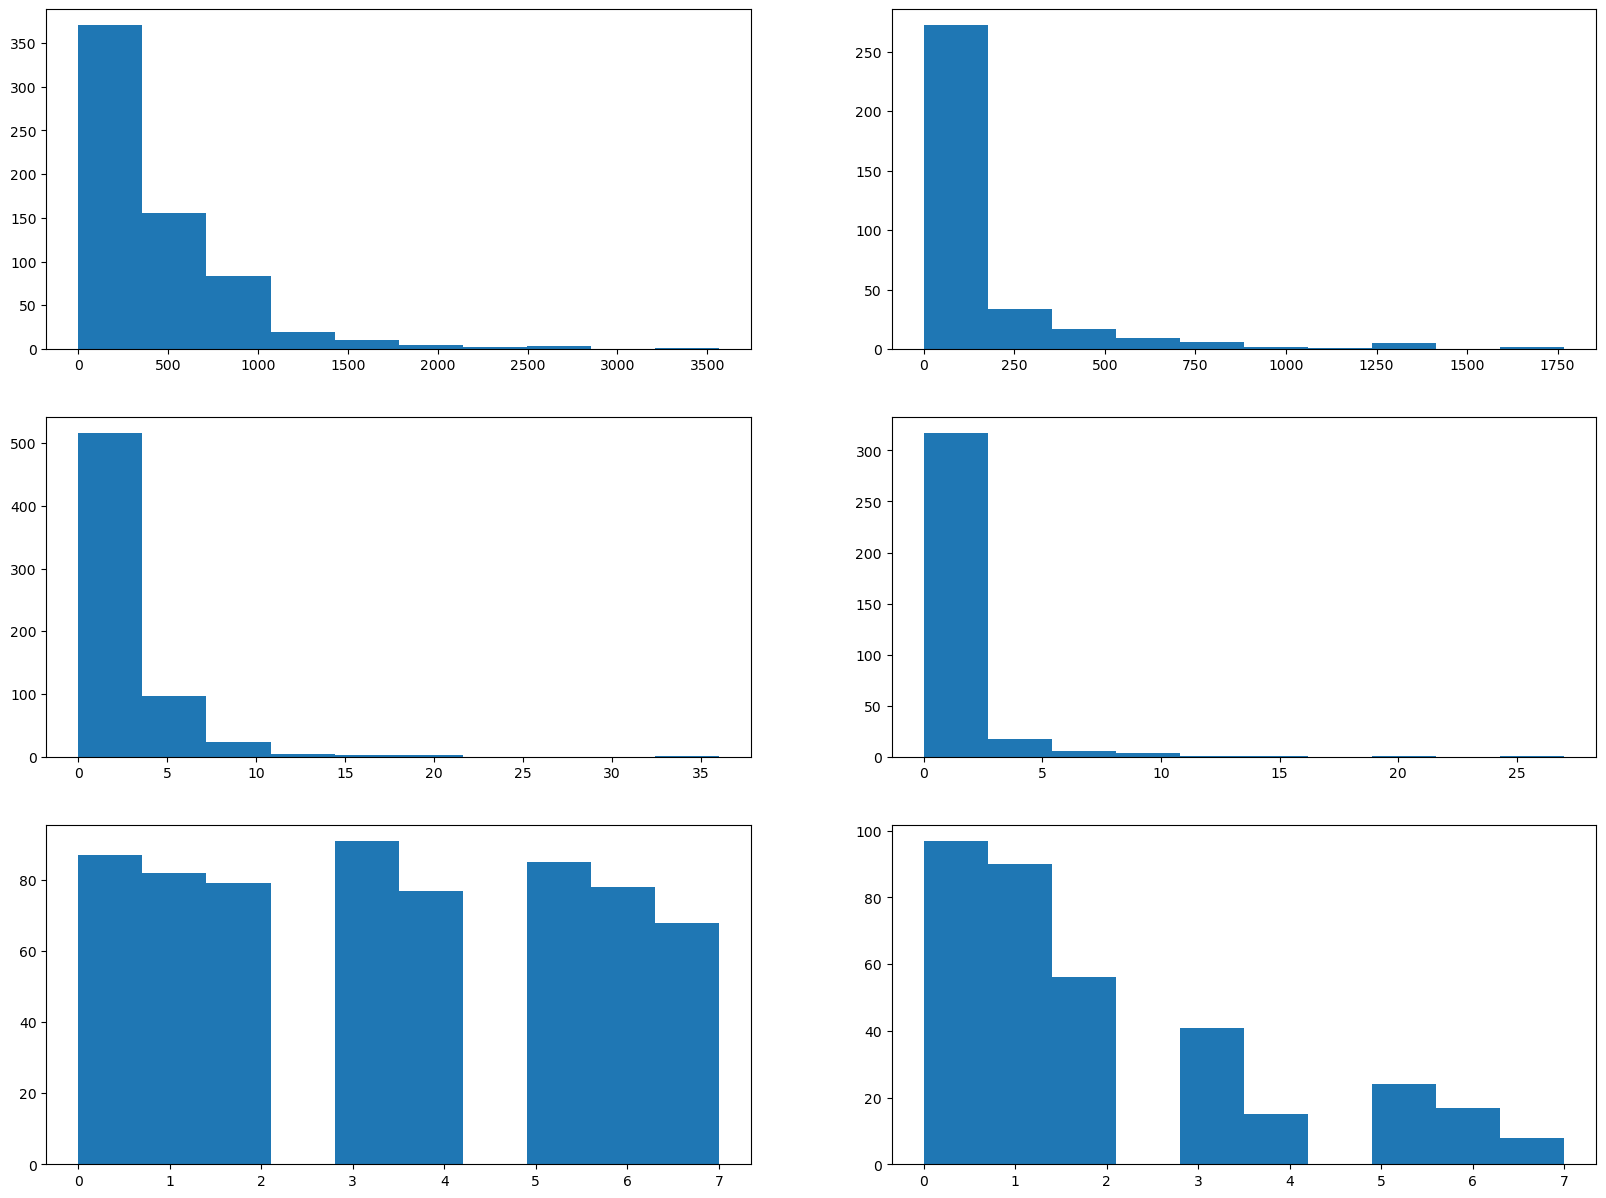

In [30]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
def plot_data(engagement_by_account, interested_variable):
    total_something = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[interested_variable]
        total_something[account_key] = total
    total_something = list(total_something.values())
    return plt.hist(total_something)  

%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 15))
plt.subplot(3, 2, 1)
plot_data(dict_converter(passing_engagement), 'total_minutes_visited')
plt.subplot(3, 2, 2)
plot_data(dict_converter(non_passing_engagement), 'total_minutes_visited')
plt.subplot(3, 2, 3)
plot_data(dict_converter(passing_engagement), 'lessons_completed')
plt.subplot(3, 2, 4)
plot_data(dict_converter(non_passing_engagement), 'lessons_completed')
plt.subplot(3, 2, 5)
plot_data(dict_converter(passing_engagement), 'has_visited')
plt.subplot(3, 2, 6)
plot_data(dict_converter(non_passing_engagement), 'has_visited')

## Improving Plots and Sharing Findings

Text(0, 0.5, 'Frequency')

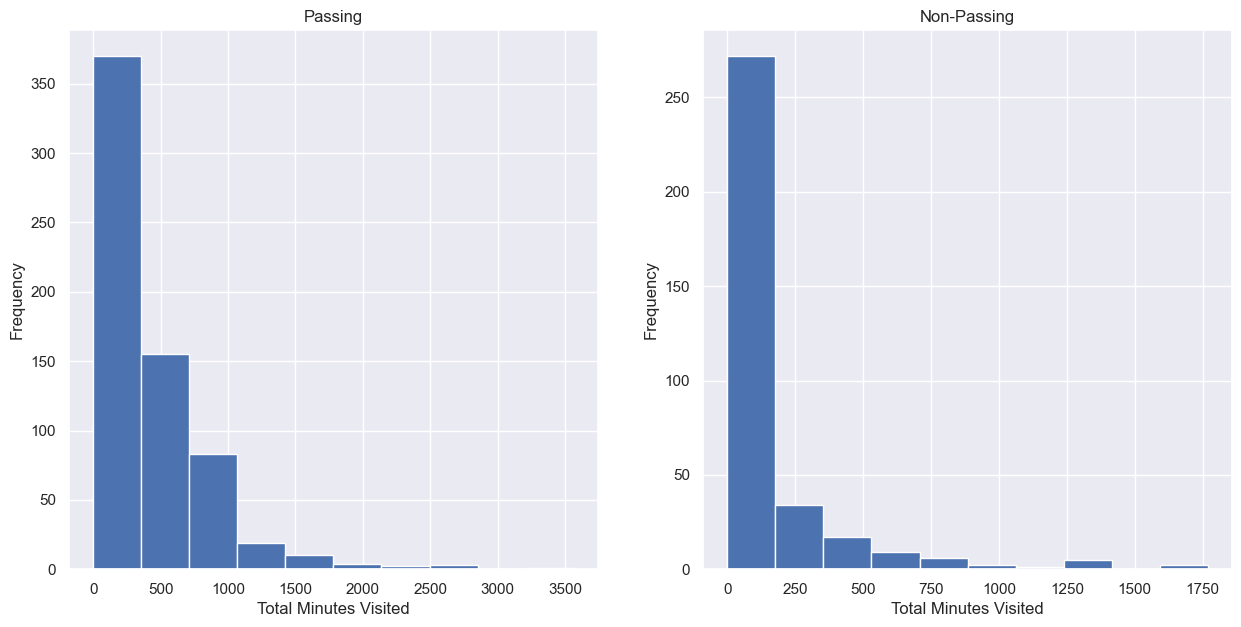

In [31]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))
plt.subplot(1, 2, 1)
plot_data(dict_converter(passing_engagement), 'total_minutes_visited')
plt.title('Passing')
plt.xlabel('Total Minutes Visited')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plot_data(dict_converter(non_passing_engagement), 'total_minutes_visited')
plt.title('Non-Passing')
plt.xlabel('Total Minutes Visited')
plt.ylabel('Frequency')